## Preparing Time Series from Wide-Form data

* First, you will prepare the dataset for time series analysis:
    * Load in the Zillow Home Value Index dataframe.
        * Note: it is a large file and may take a minute to load.
* Filter the 4 largest cities into a new dataframe.
    * Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
    * Therefore the 4 largest cities would have rank values of [0,1,2,3]
* Melt the data to long-form and prepare it for time series analysis.
    * Convert the melted dates into datetime datatype.
    * Make the datetime column the index.
* Resample the dataframe as monthly frequency, grouped by City.

In [232]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [233]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


## Filter the 4 largest cities into a new dataframe

In [234]:
new_df = df[df['SizeRank'] <= 3].copy()
new_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [235]:
# existing columns
new_df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [236]:
## First 8 columns are id columns
id_vars = new_df.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [237]:
## Melt the crypto data 
long_df = pd.melt(new_df, id_vars=id_vars, value_name='HomeValue', var_name='Date')
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,HomeValue
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


## Convert Datetime column to datetime type with pd.to_datetime
* Datetime objects have a .strftime() method (string-format-time)

In [238]:
## Compare to dates in dataframe
long_df['Date'][0]

'2000-01-31'

In [239]:
## Creating/testing our time format
import datetime
today_datetime = datetime.datetime.today()

fmt = "%Y-%m-%d"
today_datetime.strftime(fmt)

'2023-09-29'

In [240]:
%%time
## Use the fmt to convert datetime type
long_df['Date'] = pd.to_datetime(long_df['Date'], format=fmt)
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   HomeValue   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB
CPU times: total: 0 ns
Wall time: 17.6 ms


## Set datetime as Index

In [241]:
## Set Date as index
long_df = long_df.set_index('Date')
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [242]:
long_df.index

DatetimeIndex(['2000-01-31', '2000-01-31', '2000-01-31', '2000-01-31',
               '2000-02-29', '2000-02-29', '2000-02-29', '2000-02-29',
               '2000-03-31', '2000-03-31',
               ...
               '2022-07-31', '2022-07-31', '2022-08-31', '2022-08-31',
               '2022-08-31', '2022-08-31', '2022-09-30', '2022-09-30',
               '2022-09-30', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [243]:
#checking for missing values
long_df.isna().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
State         0
Metro         0
CountyName    0
HomeValue     5
dtype: int64

In [245]:
# imputing missing values using interpolate
long_df['HomeValue'] = long_df['HomeValue'].interpolate()

In [246]:
# double checking for missing values
long_df.isna().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
State         0
Metro         0
CountyName    0
HomeValue     0
dtype: int64

### Resample the dataframe as monthly frequency, grouped by City.

In [247]:
# Aggregate by currency and resample as Monthly

df_ts = long_df.groupby('RegionName').resample('M').sum(numeric_only = True)
df_ts

# check
df_ts

#checking time series data
#type(df_ts)

RegionID  SizeRank  HomeValue
RegionName Date                                     
Chicago    2000-01-31     17426         3   166139.0
           2000-02-29     17426         3   166536.0
           2000-03-31     17426         3   167368.0
           2000-04-30     17426         3   168826.0
           2000-05-31     17426         3   170499.0
...                         ...       ...        ...
New York   2022-05-31      6181         0   768797.0
           2022-06-30      6181         0   773944.0
           2022-07-31      6181         0   777692.0
           2022-08-31      6181         0   779960.0
           2022-09-30      6181         0   781622.0

[1092 rows x 3 columns]

In [248]:
# drop unnecessary columns 'RegionID' and 'SizeRank'
df_ts = df_ts.drop(columns = ['RegionID', 'SizeRank'])

# check
df_ts

HomeValue
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

## Using unstack() for Plotting

In [249]:
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

In [250]:
df_unstacked = df_ts.unstack(0)
df_unstacked

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [251]:
#checking for missing values for reassurance
df_unstacked.isna().sum()

           RegionName 
HomeValue  Chicago        0
           Houston        0
           Los Angeles    0
           New York       0
dtype: int64

In [252]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in thousands"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters

fmt_thous = mticks.FuncFormatter(thousands)

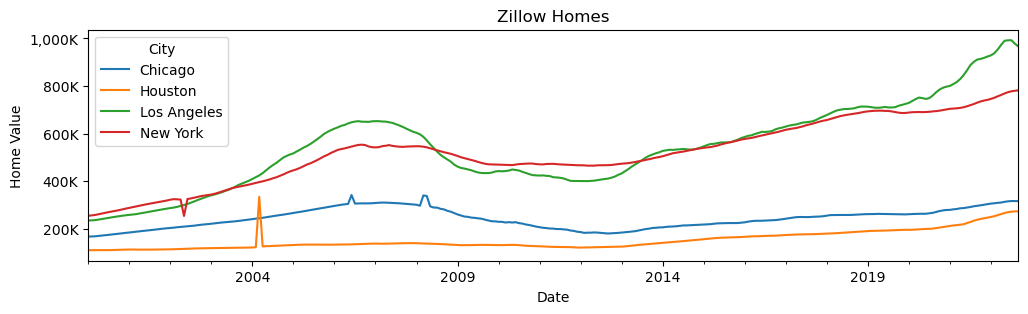

In [254]:
## Create our plot and save the ax


#ax = df_unstacked.plot()

ax = df_unstacked['HomeValue'].plot()

plt.rcParams['figure.figsize'] = (12,3)

# ax = crypto_unstacked.plot()
ax.set(ylabel="Home Value", title='Zillow Homes')



# set y-axis major formatter
ax.yaxis.set_major_formatter(fmt_thous)

#add legend

ax.legend(title = 'City')

## Which City had the highest Typical Home Value at the end of 2008? Which had the least?
   * Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 

In [255]:
#df_sliced = long_df.loc[pd.IndexSlice[:,'Value', 'RegionName'],:]

dec_hv = df_ts.loc[pd.IndexSlice[:,'2008-12'],:]
dec_hv

,,HomeValue
RegionName,Date,
Chicago,2008-12-31,265306.0
Houston,2008-12-31,131283.0
Los Angeles,2008-12-31,469294.0
New York,2008-12-31,510309.0


In [256]:
# figure out highest value
dec2008 = dec_hv.idxmax()
dec2008

HomeValue    (New York, 2008-12-31 00:00:00)
dtype: object

In [257]:
# grab city of max
city = df_ts.loc[dec2008].index[0][0]
city

'New York'

In [262]:
# grab value of max
max_val = df_ts.loc[pd.IndexSlice[city,'2008-12-31'],'HomeValue']
max_val

510309.0

In [263]:
# print statement to question
print(f"{city} had the highest typical home value at the end of \
2008, with a typical home value of ${max_val:,.0f}.")

New York had the highest typical home value at the end of 2008, with a typical home value of $510,309.


In [264]:
# figure out lowest value
declow = dec_hv.idxmin()
declow

HomeValue    (Houston, 2008-12-31 00:00:00)
dtype: object

In [265]:
# grab city of min
citylow = df_ts.loc[declow].index[0][0]
citylow

'Houston'

In [267]:
# grab value of min
min_val = df_ts.loc[pd.IndexSlice[citylow,'2008-12-31'],'HomeValue']
min_val

131283.0

## Answer

In [268]:
# print statement to question
print(f"{citylow} had the lowest typical home value at the end of \
2008, with a typical home value of ${min_val:,.0f}.")

Houston had the lowest typical home value at the end of 2008, with a typical home value of $131,283.


## How much did the home values change from November 2008 to December 2008 (in dollars)?
* Hint: you can use .diff() to calculate the change in values

In [286]:
#slicing out the month for comparison
nov_hv = df_ts.loc[pd.IndexSlice[:, '2008-11'],:]
nov_hv

,,HomeValue
RegionName,Date,
Chicago,2008-11-30,271059.0
Houston,2008-11-30,132247.0
Los Angeles,2008-11-30,481905.0
New York,2008-11-30,514767.0


In [316]:
# get the HomeValue sum for November
nov2008 = nov_hv.sum()['HomeValue']
nov2008

1399978.0

In [317]:
#slicing out the month for comparison
dec_hv = df_ts.loc[pd.IndexSlice[:,'2008-12'],:]
dec_hv

,,HomeValue
RegionName,Date,
Chicago,2008-12-31,265306.0
Houston,2008-12-31,131283.0
Los Angeles,2008-12-31,469294.0
New York,2008-12-31,510309.0


In [318]:
# get the HomeValue sum for december
dec2008 = dec_hv.sum()['HomeValue']
dec2008

1376192.0

In [323]:
co = pd.concat([dec_hv.sum(), nov_hv.sum()]).diff()
co

HomeValue        NaN
HomeValue    23786.0
dtype: float64

In [326]:
# getting is the difference between both months
diff = nov2008 - dec2008
diff

23786.0

## Answer

In [328]:
# print statement to question
print(f" The difference in Home Values between November 2008 and December 2008 was ${diff:,.0f}.") 

 The difference in Home Values between November 2008 and December 2008 was $23,786.
